# Laboratory Exercise - 2

In [848]:
import os
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot as plt
from fbprophet import Prophet
import plotly as py
import plotly.graph_objs as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Introduction 

Zillow is the leading online real estate database company. Their database of home values across the US is extremely valuable as it can allow us to model and predict home value trends. By combining the Zillow data with other economic data sources, we can work to predict which three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT). 

## Obtain

The data used in this analysis is listed below:
-  Housing – median housing value by zip code from Zillow from 1996 to present (2019-01)
    -  15,533 rows x 281 columns
-  Unemployment – includes data from the Bureau of Labor Statistics (BLS) on the civilian labor force, employment, unemployment, and unemployment rate from 1990 -2018
    -  137,463 rows x 10 columns

In [849]:
#read in the Zillow housing data
housing = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv', encoding = 'latin-1').fillna(0)
housing.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.00,335400.00,336500.00,...,1038600,1041400,1042100,1041900,1043600,1047000,1048600,1046800,1046500,1051600
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.00,212200.00,212200.00,...,332600,334500,335900,337100,338400,338400,336900,336000,335900,335100
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.00,500900.00,503100.00,...,1321000,1324800,1322600,1319900,1319400,1318400,1317200,1318000,1320700,1327000
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.00,77300.00,77300.00,...,121300,122200,123000,123600,124500,125700,126300,126800,127500,128200
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.00,95600.00,95800.00,...,176400,176800,176900,177400,178000,178600,179400,180200,180900,181700


In [850]:
housing.shape

(15533, 281)

In [851]:
housing.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
count,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,...,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00,15533.00
mean,80780.22,47669.53,7767.00,106998.05,107106.84,107213.87,107318.05,107432.34,107564.39,107737.86,...,280237.35,281748.79,283109.20,284168.41,285204.85,286412.26,287706.56,288830.46,289777.84,290596.83
std,31496.83,28985.57,4484.14,87387.13,87531.50,87676.16,87824.70,87995.78,88202.22,88464.28,...,361116.10,362685.96,365026.29,366237.44,367020.07,366667.47,364470.01,361225.65,358221.38,356512.76
min,58196.00,1001.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,21700.00,22200.00,22200.00,22000.00,21800.00,21700.00,21500.00,21600.00,21900.00,22000.00
25%,67247.00,22306.00,3884.00,59400.00,59600.00,59600.00,59800.00,59900.00,60100.00,60300.00,...,128600.00,129400.00,130000.00,130800.00,131500.00,132600.00,133600.00,134700.00,135400.00,136000.00
50%,77880.00,45742.00,7767.00,91200.00,91300.00,91300.00,91300.00,91400.00,91500.00,91600.00,...,191900.00,193100.00,194200.00,195300.00,196500.00,197700.00,199100.00,200700.00,201700.00,202600.00
75%,90300.00,73801.00,11650.00,135900.00,136000.00,136000.00,136200.00,136200.00,136400.00,136500.00,...,312100.00,314100.00,315700.00,317200.00,318300.00,319600.00,321100.00,322200.00,323900.00,325400.00
max,753844.00,99901.00,15533.00,3676700.00,3704200.00,3729600.00,3754600.00,3781800.00,3813500.00,3849600.00,...,17421900.00,17443500.00,17713600.00,18004100.00,18264300.00,18315700.00,18107200.00,17610400.00,16944500.00,16510000.00


In [852]:
housing[housing['State'] == 'AL'].Metro.value_counts()

Birmingham-Hoover         70
Huntsville                22
Mobile                    21
Tuscaloosa                17
Montgomery                14
Daphne-Fairhope-Foley     12
Fort Payne                10
Auburn-Opelika             8
Florence-Muscle Shoals     8
Dothan                     6
Gadsden                    6
Talladega-Sylacauga        6
0                          6
Alexander City             4
Columbus                   4
Enterprise                 3
Troy                       3
Decatur                    2
Albertville                1
Name: Metro, dtype: int64

In [853]:
housing.dtypes[1:20]

RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
dtype: object

In [854]:
#read in unemployment data
unemployment = pd.read_excel('ssamatab1.xlsx', skiprows= [0,1,3])
unemployment.tail()

,LAUS Code,State FIPS Code,Area FIPS Code,Area,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
137458,MT7241900000000,72.00,41900.00,"San German, PR MSA",2018.00,12.00,34092.00,30104.00,3988.00,11.70
137459,MT7241980000000,72.00,41980.00,"San Juan-Carolina-Caguas, PR MSA",2018.00,12.00,726443.00,675285.00,51158.00,7.00
137460,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan
137461,"SOURCE: BLS, LAUS",nan,nan,NaN,nan,nan,nan,nan,nan,nan
137462,"January 30, 2019",nan,nan,NaN,nan,nan,nan,nan,nan,nan


In [855]:
unemployment.shape

(137463, 10)

In [856]:
#get data types
unemployment.dtypes

LAUS Code                object
State FIPS Code         float64
Area FIPS Code          float64
Area                     object
Year                    float64
Month                   float64
Civilian Labor Force    float64
Employment              float64
Unemployment            float64
Unemployment Rate       float64
dtype: object

In [857]:
#explore quickly
unemployment.describe()

,State FIPS Code,Area FIPS Code,Year,Month,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
count,137460.00,137460.00,137460.00,137460.00,137460.00,137460.00,137460.00,137460.00
mean,29.29,32077.67,2004.00,6.50,318367.06,299620.54,18746.52,6.15
std,17.28,15016.41,8.37,3.45,751758.33,706089.67,48736.25,3.07
min,1.00,10180.00,1990.00,1.00,12153.00,11041.00,387.00,1.00
25%,13.00,20260.00,1997.00,3.75,62261.50,58340.00,3386.75,4.20
50%,29.00,30140.00,2004.00,6.50,103265.50,96752.50,6091.00,5.40
75%,44.00,41500.00,2011.00,9.25,241019.00,226691.75,14592.00,7.20
max,72.00,79600.00,2018.00,12.00,10142557.00,9749830.00,905101.00,33.20


## Scrub 

Before undergoing any analysis, the two datasets first had to be cleaned and merged. Below are the steps that were taken to clean each dataset prior to merging:

-  Housing
    -  Cleaned column names
    -  Dropped data outside of 1997-2018
    -  Changed data types
    -  Transformed the dataset from a wide format with dates as columns, to a long format with the date info all held in one column

-  Unemployment
    -  Dropped unneeded columns (LAUS Code, State FIPS Code, Area FIPS Code)
    -  Filled in missing values with 0
    -  Changed data types
    -  Merged Year and Month column to create a datetime index
    -  Removed Puerto Rico from dataset
    -  Dropped data outside of 1997-2018
    -  Dropped rows with missing values

*Note*: No downsampling was performed during this analysis so the models could use seasonal trends through the year to help improve predictions.

Once these steps were completed, the two data sets were merged using the ‘Date’ and ‘Metro’ fields that were in each data set. The structure of the final dataset is shown below:
-  df_housing – contains data on the ‘State’, ‘Metro’, ‘City’, ‘ZipCode’, ‘MedianHousingValue’, ‘Civilian Labor Force’, ‘Employment’, ‘Unemployment’, and ‘Unemployment Rate’
    -  4,342,008 rows x 9 columns


### Cleaning the Housing dataframe

In [858]:
#Change column names where needed
housing['ZipCode'] = housing['RegionName']
housing.drop(columns = ['RegionID','RegionName', '1996-04', '1996-05', '1996-06', '1996-07', 
                        '1996-08', '1996-09', '1996-10', '1996-11', '1996-12'], inplace = True)
housing.columns

Index(['City', 'State', 'Metro', 'CountyName', 'SizeRank', '1997-01',
       '1997-02', '1997-03', '1997-04', '1997-05',
       ...
       '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
       '2018-11', '2018-12', '2019-01', 'ZipCode'],
      dtype='object', length=271)

In [859]:
#set timeseries data
ts_start = housing.columns.get_loc('1997-01') #ignore data before 1996 to simplify
ts_end = housing.columns.get_loc('2018-12') + 1 #don't include 2019 data
date_columns = housing.iloc[:, ts_start:ts_end].columns.tolist()
print(ts_start, ts_end)
print(date_columns[0:4], date_columns[-5:])

5 269
['1997-01', '1997-02', '1997-03', '1997-04'] ['2018-08', '2018-09', '2018-10', '2018-11', '2018-12']


In [860]:
#change data types where needed
housing[date_columns] = housing[date_columns].astype(int)
housing['ZipCode'] = housing['ZipCode'].astype('category')
housing.dtypes

City            object
State           object
Metro           object
CountyName      object
SizeRank         int64
1997-01          int32
1997-02          int32
1997-03          int32
1997-04          int32
1997-05          int32
1997-06          int32
1997-07          int32
1997-08          int32
1997-09          int32
1997-10          int32
1997-11          int32
1997-12          int32
1998-01          int32
1998-02          int32
1998-03          int32
1998-04          int32
1998-05          int32
1998-06          int32
1998-07          int32
1998-08          int32
1998-09          int32
1998-10          int32
1998-11          int32
1998-12          int32
1999-01          int32
                ...   
2016-09          int32
2016-10          int32
2016-11          int32
2016-12          int32
2017-01          int32
2017-02          int32
2017-03          int32
2017-04          int32
2017-05          int32
2017-06          int32
2017-07          int32
2017-08          int32
2017-09    

In [861]:
#convert housing to a long format
housing2 = pd.melt(housing, id_vars = ['City', 'State', 'Metro', 'CountyName', 'ZipCode'], 
                   value_vars = date_columns)
print(housing2.shape)
housing2.head()

(4100712, 7)


,City,State,Metro,CountyName,ZipCode,variable,value
0,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60657,1997-01,344400
1,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77494,1997-01,197300
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60614,1997-01,503400
3,El Paso,TX,El Paso,El Paso County,79936,1997-01,77800
4,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77449,1997-01,96600


In [862]:
#need to change some column names
housing2.columns = ['City', 'State', 'Metro', 'CountyName', 'ZipCode', 'Date', 'MedianHousingValue']
#Convert the Date column to datetime
housing2['Date'] = pd.to_datetime(housing2['Date'], format='%Y-%m', errors='coerce').dropna()

### Cleaning the Unemployment dataframe

In [863]:
#drop uneeded columns
unemployment = unemployment.drop(columns= ['LAUS Code', 'State FIPS Code', 'Area FIPS Code'])
unemployment.columns

Index(['Area', 'Year', 'Month', 'Civilian Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate'],
      dtype='object')

In [864]:
#fill in missing values with 0
unemployment = unemployment.fillna(0)
np.sum(unemployment.isna())

Area                    0
Year                    0
Month                   0
Civilian Labor Force    0
Employment              0
Unemployment            0
Unemployment Rate       0
dtype: int64

In [865]:
#change data types where needed
unemployment['Year'] = unemployment['Year'].astype(int)
unemployment['Month'] = unemployment['Month'].astype(int)
unemployment['Civilian Labor Force'] = unemployment['Civilian Labor Force'].astype(int)
unemployment['Employment'] = unemployment['Employment'].astype(int)
unemployment['Unemployment'] = unemployment['Unemployment'].astype(int)

In [866]:
#need to combine Year and Month columns, but need to format Month column first with leading 0's
unemployment['Month'] = unemployment['Month'].apply(lambda x: str(x).zfill(2))
#combine the Year and Month columns into one
unemployment['Date'] = unemployment['Year'].map(str) + '-' + unemployment['Month'].map(str)
#Can now drop the Year and Month columns
unemployment = unemployment.drop(columns = ['Year', 'Month'])

In [867]:
#split out the state column from Area
temp = unemployment['Area'].str.split(",", n = 1, expand = True) 
unemployment = pd.concat([unemployment, temp], axis = 1)
#Can drop the area column now
unemployment = unemployment.drop(columns = ['Area'])
unemployment.columns = ['Civilian Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate', 
                        'Date', 'Metro', 'State']

In [868]:
#Convert the Date column to datetime
unemployment['Date'] = pd.to_datetime(unemployment['Date'], format='%Y-%m', errors='coerce').dropna()
unemployment.head()

,Civilian Labor Force,Employment,Unemployment,Unemployment Rate,Date,Metro,State
0,51485,48307,3178,6.20,1990-01-01,Anniston-Oxford-Jacksonville,AL MSA
1,44415,41247,3168,7.10,1990-01-01,Auburn-Opelika,AL MSA
2,457612,433590,24022,5.20,1990-01-01,Birmingham-Hoover,AL MSA
3,45859,43402,2457,5.40,1990-01-01,Daphne-Fairhope-Foley,AL MSA
4,65452,61009,4443,6.80,1990-01-01,Decatur,AL MSA


In [869]:
#Remove Puerto Rico from dataset
unemployment = unemployment[unemployment['State'] != 'PR']

In [870]:
#Need to remove 'MSA' from state
unemployment['State'] = unemployment['State'].apply(lambda x: str(x).replace(" MSA", "").replace(" ",""))
#reorganize columns 
cols = ['Date', 'Metro', 'State', 'Civilian Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate']
unemployment = unemployment[cols]
#set Date as the index
unemployment.set_index('Date', inplace = True)
unemployment.tail()

,Metro,State,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,
2018-12-01,San German,PR,34092,30104,3988,11.70
2018-12-01,San Juan-Carolina-Caguas,PR,726443,675285,51158,7.00
NaT,NaN,nan,0,0,0,0.00
NaT,NaN,nan,0,0,0,0.00
NaT,NaN,nan,0,0,0,0.00


In [871]:
#drop rows with missing values left
unemployment = unemployment.dropna()
unemployment.tail()

,Metro,State,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,
2018-12-01,Guayama,PR,20811,18064,2747,13.20
2018-12-01,Mayaguez,PR,26600,23715,2885,10.80
2018-12-01,Ponce,PR,92058,81672,10386,11.30
2018-12-01,San German,PR,34092,30104,3988,11.70
2018-12-01,San Juan-Carolina-Caguas,PR,726443,675285,51158,7.00


In [872]:
#Filter down date date to 1997 to 2018
print(unemployment.shape)
unemployment = unemployment.loc['1997-01-01':'2018-12-01']
print(unemployment.shape)

(137460, 6)
(104280, 6)


### Merge Housing and Unemployment Dataframe together

In [873]:
#reset the index of unemployment for merging
unemployment2 = unemployment.reset_index()
#merge unemployment and housing2 by Metro
df_housing = pd.merge(housing2, unemployment2, how = 'left', on = ['Date','Metro'])
df_housing.head()

,City,State_x,Metro,CountyName,ZipCode,Date,MedianHousingValue,State_y,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
0,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60657,1997-01-01,344400,IL-IN-WI,4582424.00,4345274.00,237150.00,5.20
1,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77494,1997-01-01,197300,TX,2291334.00,2160868.00,130466.00,5.70
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,60614,1997-01-01,503400,IL-IN-WI,4582424.00,4345274.00,237150.00,5.20
3,El Paso,TX,El Paso,El Paso County,79936,1997-01-01,77800,TX,293639.00,259645.00,33994.00,11.60
4,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,77449,1997-01-01,96600,TX,2291334.00,2160868.00,130466.00,5.70


In [874]:
#Clean df_housing dataframe
df_housing.set_index('Date', inplace = True) #set the date as the index
df_housing.drop(columns = ['State_y'], inplace = True) #drop State_y
df_housing.rename(columns = {'State_x': 'State'}, inplace = True) #change State_x to State
#reorganize columns 
cols = ['State', 'Metro', 'City', 'ZipCode', 'MedianHousingValue', 'Civilian Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate']
df_housing = df_housing[cols]
print(df_housing.shape)
df_housing.head()

(4342008, 9)


,State,Metro,City,ZipCode,MedianHousingValue,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,,,,
1997-01-01,IL,Chicago-Naperville-Elgin,Chicago,60657,344400,4582424.00,4345274.00,237150.00,5.20
1997-01-01,TX,Houston-The Woodlands-Sugar Land,Katy,77494,197300,2291334.00,2160868.00,130466.00,5.70
1997-01-01,IL,Chicago-Naperville-Elgin,Chicago,60614,503400,4582424.00,4345274.00,237150.00,5.20
1997-01-01,TX,El Paso,El Paso,79936,77800,293639.00,259645.00,33994.00,11.60
1997-01-01,TX,Houston-The Woodlands-Sugar Land,Katy,77449,96600,2291334.00,2160868.00,130466.00,5.70


## Explore 

Find the 3 zip codes whose median household value increased the most from 1997 to present (2019-01).

In [875]:
#group the housing dataframe by state for average median housing values by zip code over time
zip_housing = housing.groupby(['ZipCode']).mean()
#drop SizeRank column
zip_housing.drop(columns = 'SizeRank', inplace = True) 
zip_housing.head()

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
ZipCode,,,,,,,,,,,,,,,,,,,,,
1001,111900,112100,112300,112500,112800,113000,113300,113600,113900,114200,...,224200,224900,225200,225000,225300,225600,226100,226600,227400,227900
1002,157500,158000,158600,159300,160000,160700,161400,162100,162700,163400,...,358200,362100,364200,365000,365500,365400,366200,366900,365700,364400
1005,105200,105600,105900,106100,106400,106700,106900,107100,107300,107600,...,222000,223500,224600,225900,227700,229500,231200,231800,231800,232700
1007,130700,131200,131900,132600,133200,133700,134200,134500,134800,135000,...,272400,273000,273600,274600,276500,277800,278600,279300,279500,279500
1008,116400,116400,116400,116300,116300,116400,116500,116600,116700,116900,...,217300,217600,218500,221100,223400,223200,222700,224600,227500,228300


In [876]:
#replace all 0's with the first value found in row
for i in range(len(zip_housing)):
    values = zip_housing.iloc[i].values #get all values for the row
    first_value_index = np.where(values > 0)[0][0] #find the index where the first number is found
    first_value = values[first_value_index] #find the value of the first number
    zip_housing.iloc[i] = zip_housing.iloc[i].replace(0,first_value) #replace all 0's in row with first_number

In [877]:
#Create a column for percent difference from 1997 to 2019
zip_housing['PercentChange'] = round((zip_housing['2019-01'] / zip_housing['1997-01']) * 100, 2)
#sort by Percent Change to get 3 largest changes
zip_housing.sort_values(by = 'PercentChange', ascending = False, inplace = True)
zip_housing = zip_housing.head(3)
zip_housing

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,PercentChange
ZipCode,,,,,,,,,,,,,,,,,,,,,
19146,21400,21100,20800,20600,20400,20100,20000,19800,19700,19600,...,327600,329600,328400,327300,328000,329600,331600,334300,337000,1574.77
11222,146600,146900,147100,147200,147200,147200,147400,147800,148500,149400,...,1751300,1776300,1795800,1838100,1838300,1791300,1743500,1703900,1663500,1134.72
11211,133100,133600,134100,134400,134700,135000,135400,135900,136400,137200,...,1604900,1572400,1549800,1524800,1507300,1497200,1491600,1492900,1498800,1126.07


The top 3 fastest growing zip codes from 1997 to present were 19146 (Philadelphia, PA), 11222 (Brooklyn, NY), and 11211 (Brooklyn, NY). Repeat analysis above, but only for 2010 to present (2019-01).

In [878]:
#group the housing dataframe by state for average median housing values by zip code over time
zip_housing2 = housing.groupby(['ZipCode']).mean()
#drop SizeRank column
zip_housing2.drop(columns = 'SizeRank', inplace = True) 
#filter the dataset to 2010 to present
zip_housing2.drop(zip_housing.iloc[:, 0:156], inplace=True, axis=1)

In [879]:
#replace all 0's with the first value found in row
for i in range(len(zip_housing2)):
    values = zip_housing2.iloc[i].values #get all values for the row
    first_value_index = np.where(values > 0)[0][0] #find the index where the first number is found
    first_value = values[first_value_index] #find the value of the first number
    zip_housing2.iloc[i] = zip_housing2.iloc[i].replace(0,first_value) #replace all 0's in row with first_number

In [880]:
#Create a column for percent difference from 1997 to 2019
zip_housing2['PercentChange'] = round((zip_housing2['2019-01'] / zip_housing['2010-01']) * 100, 2)
#sort by Percent Change to get 3 largest changes
zip_housing2.sort_values(by = 'PercentChange', ascending = False, inplace = True)
zip_housing2 = zip_housing2.head(3)
zip_housing2

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,PercentChange
ZipCode,,,,,,,,,,,,,,,,,,,,,
19146,116700,117400,117600,117200,116700,116100,115000,112800,109800,107100,...,327600,329600,328400,327300,328000,329600,331600,334300,337000,288.77
11222,607900,609300,598500,580700,576300,592200,604800,611500,613400,618300,...,1751300,1776300,1795800,1838100,1838300,1791300,1743500,1703900,1663500,273.65
11211,617200,626900,618000,591900,586300,602200,610500,610100,606700,603400,...,1604900,1572400,1549800,1524800,1507300,1497200,1491600,1492900,1498800,242.84


The top 3 fastest growing zip-codes (19146, 11222, and 11211) are the same from 1997 to present as it is for 2010 to present. Based on this analysis, these three zip codes seem to provide the best investment opportunity for the SREIT.

Find the 4 states whose median household value increased the most from 1997 to 2018.

In [881]:
#group the housing dataframe by state for average median housing values by state over time
state_housing = housing.groupby(['State']).mean()
#need to impute values for North Dakota since they are missing values from 1997
#first value from ND is 52227.272727 in 2005-03. Fill in all dates before with that first value
state_housing.loc['ND','1997-01':'2005-02'] = 52227.272727
#drop SizeRank column
state_housing.drop(columns = 'SizeRank', inplace = True) 
#Create a column for percent difference from 1997 to 2019
state_housing['PercentChange'] = round((state_housing['2019-01'] / state_housing['1997-01']) * 100, 2)
#sort by Percent Change to get 6 largest changes
state_housing.sort_values(by = 'PercentChange', ascending = False, inplace = True)
state_housing = state_housing.head(6)

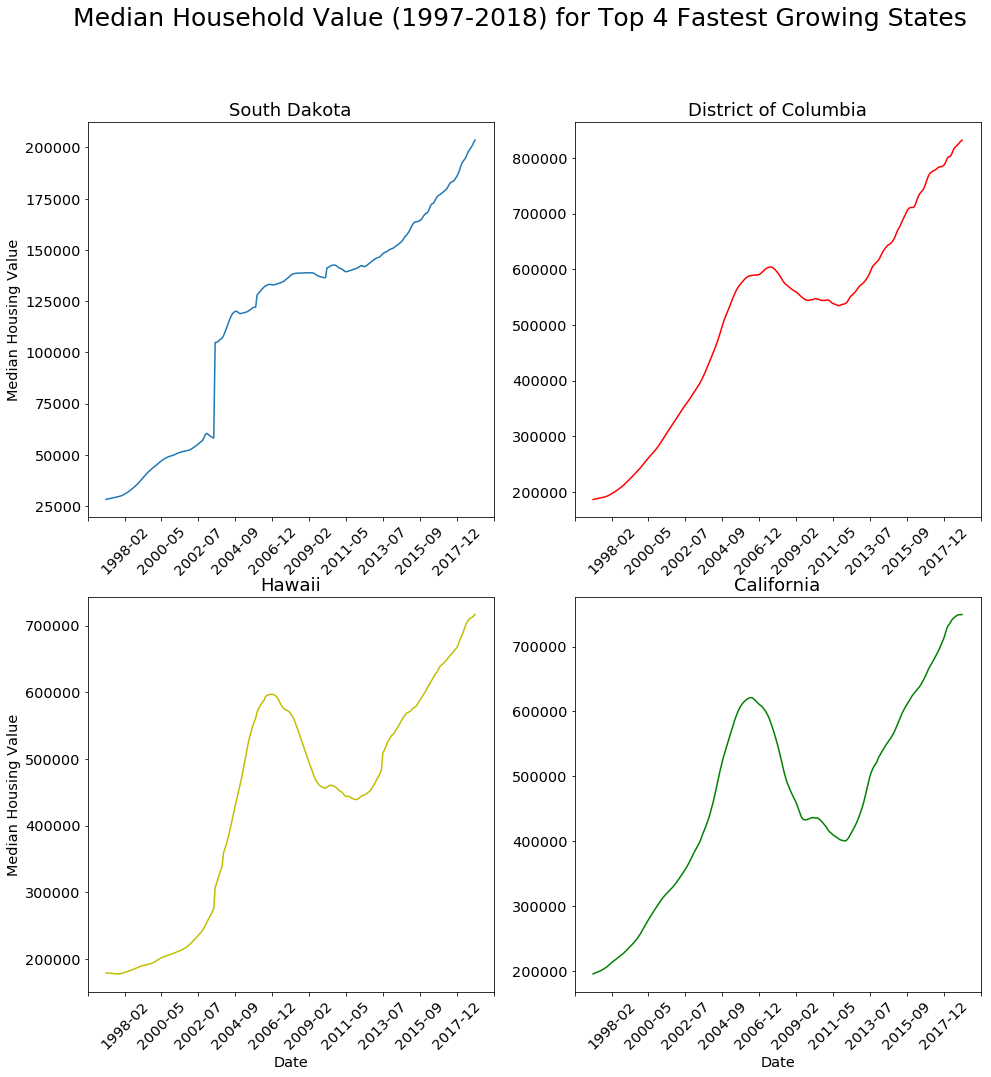

In [882]:
#set a variable for the date_columns
date_columns = state_housing.columns[:-1]

f = plt.figure(figsize=(16,16))

ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)
    
#plot first graph
ax.plot(date_columns, state_housing.loc['SD'][:-1])
# decrease ticks
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 12), 1))
#set axis labels and title
ax.set_ylabel('Median Housing Value')
ax.set_title('South Dakota', fontsize = 18)

#plot second graph
ax2.plot(date_columns, state_housing.loc['DC'][:-1], 'r')
# decrease ticks
xmin, xmax = ax2.get_xlim()
ax2.set_xticks(np.round(np.linspace(xmin, xmax, 12), 1))
#set axis labels and title
#ax2.set_ylabel('Median Housing Value')
ax2.set_title('District of Columbia', fontsize = 18)

#plot third graph
ax3.plot(date_columns, state_housing.loc['HI'][:-1], 'y')
# decrease ticks
xmin, xmax = ax3.get_xlim()
ax3.set_xticks(np.round(np.linspace(xmin, xmax, 12), 1))
#set axis labels and title
ax3.set_xlabel('Date')
ax3.set_ylabel('Median Housing Value')
ax3.set_title('Hawaii', fontsize = 18)

#plot fourth graph
ax4.plot(date_columns, state_housing.loc['CA'][:-1], 'g')
# decrease ticks
xmin, xmax = ax4.get_xlim()
ax4.set_xticks(np.round(np.linspace(xmin, xmax, 12), 1))
#set axis labels and title
ax4.set_xlabel('Date')
#ax4.set_ylabel('Median Housing Value')
ax4.set_title('California', fontsize = 18)

#rotate all axis labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

#set title
f.suptitle('Median Household Value (1997-2018) for Top 4 Fastest Growing States', fontsize = 25)

plt.show()

In [883]:
housing[housing['State'] == 'AR']['Metro'].value_counts()

Little Rock-North Little Rock-Conway    28
0                                       25
Fayetteville-Springdale-Rogers          21
Fort Smith                              14
Searcy                                   6
Russellville                             6
Mountain Home                            4
Harrison                                 4
Hot Springs                              4
Memphis                                  3
Jonesboro                                3
Pine Bluff                               2
Batesville                               2
Texarkana                                1
Paragould                                1
Magnolia                                 1
Name: Metro, dtype: int64

In [884]:
#Arkansas metro areas: Hot Springs, Little Rock, Fayetteville, Searcy
Hot_Springs = housing.loc[(housing['Metro'] == 'Hot Springs') & (housing['State'] == 'AR')]
Little_Rock = housing.loc[(housing['Metro'] == 'Little Rock-North Little Rock-Conway') & (housing['State'] == 'AR')]
Fayetteville = housing.loc[(housing['Metro'] == 'Fayetteville-Springdale-Rogers') & (housing['State'] == 'AR')]
Searcy = housing.loc[(housing['Metro'] == 'Searcy') & (housing['State'] == 'AR')]

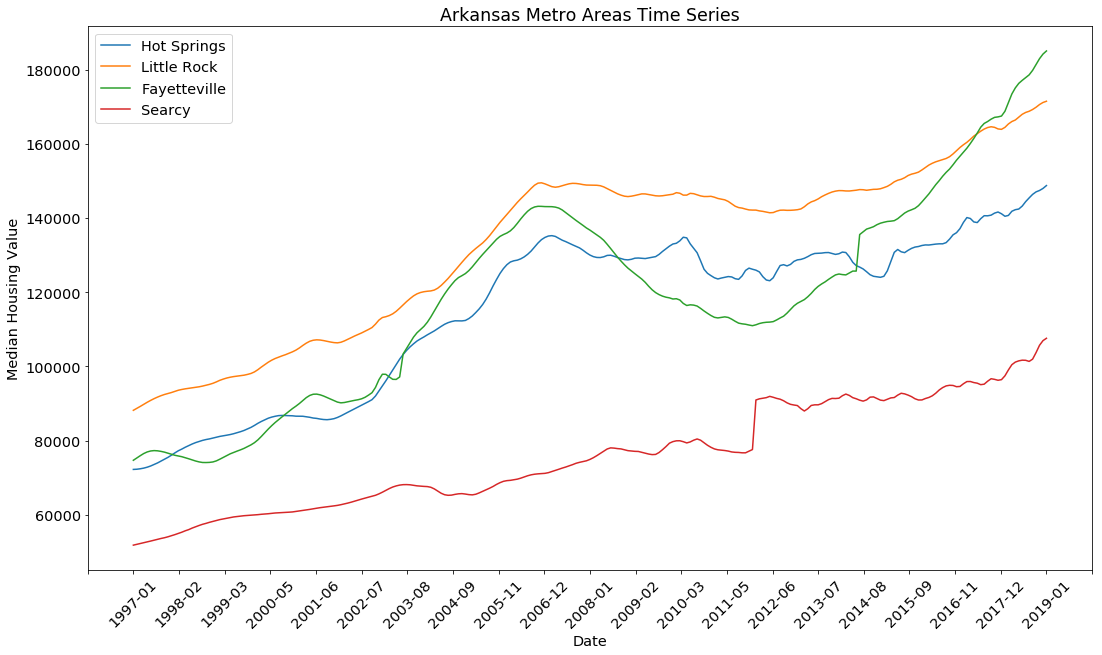

In [885]:
# timeseries plot
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.plot(Hot_Springs[date_columns].mean(), linestyle='solid')
ax.plot(Little_Rock[date_columns].mean(), linestyle='solid')
ax.plot(Fayetteville[date_columns].mean(), linestyle='solid')
ax.plot(Searcy[date_columns].mean(), linestyle='solid')

# decrease ticks
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 23), 1))

#set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Median Housing Value')
ax.set_title('Arkansas Metro Areas Time Series')

#increase font size
plt.rcParams.update({'font.size': 14.5})

# rotate ticks + show legend
plt.xticks(rotation=45)
plt.gca().legend(('Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy'))

# show overall plot
plt.show()

In [886]:
#make a new dataframe for plotting the median housing values by state in December
geo_housing = df_housing[['State', 'MedianHousingValue']] #filter to just state and median housing value
geo_housing = geo_housing[geo_housing.index.month.isin([12])] #filter to just december
geo_housing = geo_housing.groupby(['State']).mean() #groupby State
geo_housing = round(geo_housing['MedianHousingValue'],0) #round to 0 decimal places
geo_housing = pd.Series.to_frame(geo_housing).reset_index() #convert back to dataframe
geo_housing.head()

,State,MedianHousingValue
0,AK,251838.00
1,AL,112026.00
2,AR,99936.00
3,AZ,201366.00
4,CA,476010.00


In [887]:
#build a geographic model of median housing values by state using plotly
data = dict (
    type = 'choropleth',
    locations = geo_housing['State'],
    locationmode='USA-states',
    colorscale = 'Viridis',
    z=geo_housing['MedianHousingValue'])

layout = dict(
        title = 'USA States Median Housing Values for December (1997-2018)<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

map = go.Figure(data=[data], layout = layout)
py.plotly.iplot(map)

California has the highest average median housing value for December in the dataset by a large margin. 

## Model

Develop model(s) for forecasting average median housing value by zip code for 2018.

In [888]:
#Check to make sure there are no missing values in ZipCode
print(np.sum(df_housing['ZipCode'].isna()))
print(len(df_housing[df_housing['ZipCode'] ==  0]))

0
0


In [889]:
#make training and test sets
df_housing_train = df_housing.loc['1997-01-01':'2017-12-01'] #1997 to 2017 is training data
df_housing_test = df_housing.loc['2018-01-01':] #2018 is testing data
print(df_housing_train.shape)
print(df_housing_test.shape)

(4144644, 9)
(197364, 9)


### Univariate Model

In [890]:
#first test with one zip code to see how this works
df_housing_train1 = df_housing_train[df_housing_train['ZipCode'] == 60657]
df_housing_test1 = df_housing_test[df_housing_test['ZipCode'] == 60657]
df_housing_train1.tail()

,State,Metro,City,ZipCode,MedianHousingValue,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,,,,
2017-08-01,IL,Chicago-Naperville-Elgin,Chicago,60657,1007800,4920610.00,4671413.00,249197.00,5.10
2017-09-01,IL,Chicago-Naperville-Elgin,Chicago,60657,1008900,4927949.00,4678851.00,249098.00,5.10
2017-10-01,IL,Chicago-Naperville-Elgin,Chicago,60657,1011400,4928135.00,4683258.00,244877.00,5.00
2017-11-01,IL,Chicago-Naperville-Elgin,Chicago,60657,1015700,4928398.00,4683377.00,245021.00,5.00
2017-12-01,IL,Chicago-Naperville-Elgin,Chicago,60657,1021800,4926948.00,4682422.00,244526.00,5.00


In [891]:
df_housing_train1_uni = df_housing_train1['MedianHousingValue']
df_housing_train1_uni.head()

Date
1997-01-01    344400
1997-02-01    345700
1997-03-01    346700
1997-04-01    347800
1997-05-01    349000
Name: MedianHousingValue, dtype: int32

In [892]:
# SARIMA example

# fit model
model = SARIMAX(df_housing_train1_uni, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df_housing_train1_uni), len(df_housing_train1_uni))
print(f"Estimated monthly value for 2018-01-01 is {round(float(yhat),0)}")

Estimated monthly value for 2018-01-01 is 1027912.0


This is a working model to give a forecast for a single zip code. Make this into a function so that 2018 predictions can be made for any zip code. 

In [893]:
def zillow_housing_prediction_univariate(df_housing, zip_code):
    #make training and test sets and fill in na values with 0
    df_housing_train = df_housing.loc['1997-01-01':'2017-12-01'].fillna(0) #1997 to 2017 is training data
    df_housing_test = df_housing.loc['2018-01-01':].fillna(0) #2018 is testing data
    #create training and test set for zipcode
    df_train = df_housing_train[df_housing_train['ZipCode'] == zip_code]['MedianHousingValue']
    df_test = df_housing_test[df_housing_test['ZipCode'] == zip_code]['MedianHousingValue']
    #create model
    model = SARIMAX(df_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(df_train), len(df_train))
    difference = abs(round(float(yhat),0) - df_test.loc['2018-01-01'])
    #print output
    print(f"Estimated monthly value for 2018-01-01 in {zip_code} is {round(float(yhat),0)}. Actual value was {df_test.loc['2018-01-01']}. Residual is {difference}.")

In [894]:
#Test 1
zillow_housing_prediction_univariate(df_housing, 22206)

Estimated monthly value for 2018-01-01 in 22206 is 553181.0. Actual value was 552800. Residual is 381.0.


In [895]:
#Test 2
zillow_housing_prediction_univariate(df_housing, 79936)

Estimated monthly value for 2018-01-01 in 79936 is 119847.0. Actual value was 120200. Residual is 353.0.


### Multivariate Model 

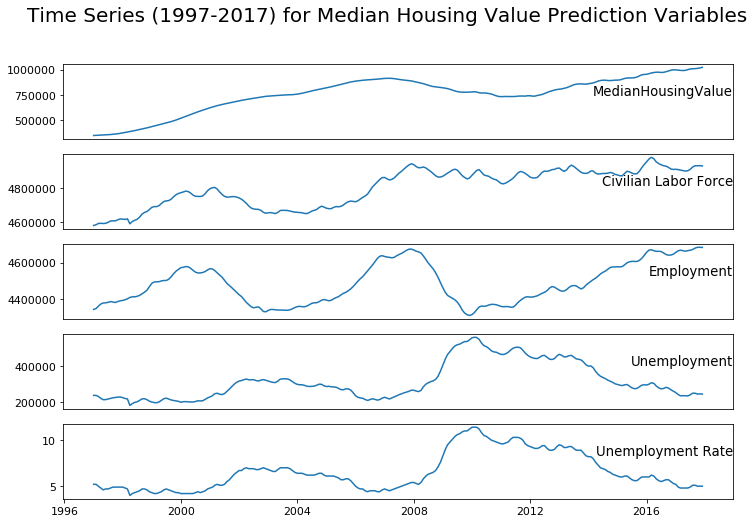

In [896]:
#build subplots for each numerical variables
groups = [4,5,6,7,8]
values = df_housing_train1.values #make each row an array
dates = df_housing_train1.index
i = 1
#plot each column
plt.figure(figsize = (12,8))
#decrease font size
plt.rcParams.update({'font.size': 11})

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(dates, values[:, group])
    #remove x-axis ticks for all but last subplot
    if group == 8:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True) # labels along the bottom edge are off
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
    plt.title(df_housing_train1.columns[group], y=0.5, loc='right')
    i += 1

#set title
plt.suptitle('Time Series (1997-2017) for Median Housing Value Prediction Variables', fontsize = 20)

plt.show()    


In [897]:
#make a new df with 1 zip code for testing
df_housing_sub = df_housing[df_housing['ZipCode'] == 60657]
df_housing_sub.head()

,State,Metro,City,ZipCode,MedianHousingValue,Civilian Labor Force,Employment,Unemployment,Unemployment Rate
Date,,,,,,,,,
1997-01-01,IL,Chicago-Naperville-Elgin,Chicago,60657,344400,4582424.00,4345274.00,237150.00,5.20
1997-02-01,IL,Chicago-Naperville-Elgin,Chicago,60657,345700,4586740.00,4349973.00,236767.00,5.20
1997-03-01,IL,Chicago-Naperville-Elgin,Chicago,60657,346700,4593946.00,4362623.00,231323.00,5.00
1997-04-01,IL,Chicago-Naperville-Elgin,Chicago,60657,347800,4595013.00,4374380.00,220633.00,4.80
1997-05-01,IL,Chicago-Naperville-Elgin,Chicago,60657,349000,4593599.00,4380287.00,213312.00,4.60


In [898]:
#Need to format the data for analysis

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

values = df_housing_sub.fillna(0).iloc[:,4:].values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
#drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var1(t)
1       0.00       0.00       0.08       0.16       0.21     0.00
2       0.00       0.01       0.09       0.16       0.21     0.00
3       0.00       0.03       0.13       0.14       0.18     0.00
4       0.00       0.03       0.16       0.12       0.15     0.01
5       0.01       0.03       0.17       0.10       0.13     0.01
(263, 6)


In [899]:
# split into train and test sets
values = reframed.values
train = values[:251] #all but last 12 are for training
test = values[251:] #last 12 is 2018
print(train.shape)
print(test.shape)

(251, 6)
(12, 6)


In [900]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:,-1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(251, 1, 5) (251,) (12, 1, 5) (12,)


Train on 251 samples, validate on 12 samples
Epoch 1/50
 - 12s - loss: 0.5726 - val_loss: 0.9561
Epoch 2/50
 - 0s - loss: 0.5378 - val_loss: 0.9140
Epoch 3/50
 - 0s - loss: 0.5035 - val_loss: 0.8717
Epoch 4/50
 - 0s - loss: 0.4693 - val_loss: 0.8287
Epoch 5/50
 - 0s - loss: 0.4348 - val_loss: 0.7850
Epoch 6/50
 - 0s - loss: 0.4002 - val_loss: 0.7406
Epoch 7/50
 - 0s - loss: 0.3657 - val_loss: 0.6950
Epoch 8/50
 - 0s - loss: 0.3310 - val_loss: 0.6486
Epoch 9/50
 - 0s - loss: 0.2966 - val_loss: 0.6012
Epoch 10/50
 - 0s - loss: 0.2620 - val_loss: 0.5523
Epoch 11/50
 - 0s - loss: 0.2269 - val_loss: 0.5019
Epoch 12/50
 - 0s - loss: 0.1912 - val_loss: 0.4502
Epoch 13/50
 - 0s - loss: 0.1625 - val_loss: 0.4003
Epoch 14/50
 - 0s - loss: 0.1496 - val_loss: 0.3551
Epoch 15/50
 - 0s - loss: 0.1418 - val_loss: 0.3148
Epoch 16/50
 - 0s - loss: 0.1378 - val_loss: 0.2801
Epoch 17/50
 - 0s - loss: 0.1369 - val_loss: 0.2512
Epoch 18/50
 - 0s - loss: 0.1369 - val_loss: 0.2281
Epoch 19/50
 - 0s - loss: 0

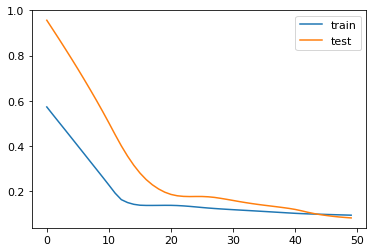

In [901]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [902]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 60002.014


In [903]:
#set number format to float so they aren't in scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#create a dataframe of the predicted and actual values to view them
preds_vs_actual = pd.DataFrame(inv_y, inv_yhat).reset_index()
#change column names
preds_vs_actual.columns = ['Predicted', 'Actual'] 
#set index to the 2018 dates
preds_vs_actual.set_index(df_housing_sub.index[-12:], inplace = True)
#view predictions
preds_vs_actual

,Predicted,Actual
Date,,
2018-01-01,997567.50,1028200.00
2018-02-01,975906.19,1033800.06
2018-03-01,996202.88,1037000.00
2018-04-01,1000002.00,1038600.00
2018-05-01,975030.88,1041400.00
2018-06-01,964050.50,1042100.00
2018-07-01,966603.75,1041900.00
2018-08-01,976261.81,1043600.00
2018-09-01,975218.50,1047000.00


It is a very lengthy process to test this model on all zip codes so it is best for now to make a function so that this is repeatable for any zip code chosen. 

In [904]:
#make a dictionary to store the results
multivariate_prediction_dict = {}

def zillow_housing_prediction_multivariate(df_housing, zip_code):
    """
    This function takes in the cleaned df_housing dataframe and lets the user
    pass in a zip_code to make 2018 predictions using the multivariate model created. 
    All results are added to the prediction_dict dictionary at the end to be analyzed.
    """
    #make a new df with 1 zip code
    df_housing_sub = df_housing[df_housing['ZipCode'] == zip_code]
    values = df_housing_sub.fillna(0).iloc[:,4:].values
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    #drop columns we don't want to predict
    reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
    # split into train and test sets
    values = reframed.values
    train = values[:251] #all but last 12 are for training
    test = values[251:] #last 12 is 2018
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:,-1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)    
    #set number format to float so they aren't in scientific notation
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    #create a dataframe of the predicted and actual values to view them
    preds_vs_actual = pd.DataFrame(inv_y, inv_yhat).reset_index()
    #change column names
    preds_vs_actual.columns = ['Predicted', 'Actual'] 
    #set index to the 2018 dates
    preds_vs_actual.set_index(df_housing_sub.index[-12:], inplace = True)
    #view predictions
    multivariate_prediction_dict[zip_code] = preds_vs_actual
    #return the prediction_dict entry that was just entered
    return(multivariate_prediction_dict[zip_code])

Test the function on a few zip codes.

In [906]:
#test 1
zillow_housing_prediction_multivariate(df_housing, 77494)

Train on 251 samples, validate on 12 samples
Epoch 1/50
 - 12s - loss: 0.4929 - val_loss: 0.9583
Epoch 2/50
 - 0s - loss: 0.4649 - val_loss: 0.9188
Epoch 3/50
 - 0s - loss: 0.4367 - val_loss: 0.8791
Epoch 4/50
 - 0s - loss: 0.4085 - val_loss: 0.8389
Epoch 5/50
 - 0s - loss: 0.3801 - val_loss: 0.7980
Epoch 6/50
 - 0s - loss: 0.3512 - val_loss: 0.7561
Epoch 7/50
 - 0s - loss: 0.3217 - val_loss: 0.7130
Epoch 8/50
 - 0s - loss: 0.2914 - val_loss: 0.6682
Epoch 9/50
 - 0s - loss: 0.2610 - val_loss: 0.6222
Epoch 10/50
 - 0s - loss: 0.2313 - val_loss: 0.5747
Epoch 11/50
 - 0s - loss: 0.2048 - val_loss: 0.5273
Epoch 12/50
 - 0s - loss: 0.1900 - val_loss: 0.4833
Epoch 13/50
 - 0s - loss: 0.1825 - val_loss: 0.4441
Epoch 14/50
 - 0s - loss: 0.1781 - val_loss: 0.4098
Epoch 15/50
 - 0s - loss: 0.1748 - val_loss: 0.3799
Epoch 16/50
 - 0s - loss: 0.1723 - val_loss: 0.3539
Epoch 17/50
 - 0s - loss: 0.1701 - val_loss: 0.3311
Epoch 18/50
 - 0s - loss: 0.1680 - val_loss: 0.3111
Epoch 19/50
 - 0s - loss: 0

,Predicted,Actual
Date,,
2018-01-01,319408.69,322700.00
2018-02-01,320491.28,326500.00
2018-03-01,323156.28,330400.00
2018-04-01,325363.69,332600.00
2018-05-01,327461.53,334500.00
2018-06-01,328980.62,335900.00
2018-07-01,330180.41,337100.00
2018-08-01,331591.66,338400.00
2018-09-01,332133.66,338400.00


In [907]:
#test 2
zillow_housing_prediction_multivariate(df_housing, 22206)

Train on 251 samples, validate on 12 samples
Epoch 1/50
 - 12s - loss: 0.4811 - val_loss: 0.8768
Epoch 2/50
 - 0s - loss: 0.4494 - val_loss: 0.8303
Epoch 3/50
 - 0s - loss: 0.4188 - val_loss: 0.7833
Epoch 4/50
 - 0s - loss: 0.3887 - val_loss: 0.7360
Epoch 5/50
 - 0s - loss: 0.3591 - val_loss: 0.6883
Epoch 6/50
 - 0s - loss: 0.3298 - val_loss: 0.6404
Epoch 7/50
 - 0s - loss: 0.3008 - val_loss: 0.5915
Epoch 8/50
 - 0s - loss: 0.2719 - val_loss: 0.5421
Epoch 9/50
 - 0s - loss: 0.2436 - val_loss: 0.4923
Epoch 10/50
 - 0s - loss: 0.2163 - val_loss: 0.4419
Epoch 11/50
 - 0s - loss: 0.1892 - val_loss: 0.3905
Epoch 12/50
 - 0s - loss: 0.1632 - val_loss: 0.3392
Epoch 13/50
 - 0s - loss: 0.1477 - val_loss: 0.2911
Epoch 14/50
 - 0s - loss: 0.1393 - val_loss: 0.2477
Epoch 15/50
 - 0s - loss: 0.1359 - val_loss: 0.2108
Epoch 16/50
 - 0s - loss: 0.1350 - val_loss: 0.1808
Epoch 17/50
 - 0s - loss: 0.1357 - val_loss: 0.1576
Epoch 18/50
 - 0s - loss: 0.1365 - val_loss: 0.1410
Epoch 19/50
 - 0s - loss: 0

,Predicted,Actual
Date,,
2018-01-01,535970.69,552800.00
2018-02-01,539307.81,559600.00
2018-03-01,547531.38,572900.00
2018-04-01,552239.25,579700.00
2018-05-01,553370.31,576700.00
2018-06-01,553209.62,568500.00
2018-07-01,553252.62,561500.00
2018-08-01,548143.12,555000.00
2018-09-01,541192.25,550000.00


## Conclusion 

The ability to analyze and understand trends in housing data is a very important data. Using the two datasets from Zillow and BLS, we were able to create multiple models that were able to predict future housing values. This information can be used to help assist in investent strategies for SREIT, or just to help understand local housing trends in your area. 

## Resources 

1. Zillow (https://www.zillow.com/research/data/) - used for median housing value across the US from 1997-present.
2. Bureau of Labor Statistics (BLS) (https://www.bls.gov/data/) - used for unemployment data
3. Multivariate Time Series Forecasting with LSTMSs in Keras (https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/) - code was used and modified slightly to help run multivariate time series models. 